In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
from skimage.feature.texture import greycomatrix, greycoprops
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import PIL
import skimage
% matplotlib inline

In [267]:
#Read the CSV file and store in a dataframe called df 
df=pd.read_csv("/content/drive/MyDrive/cleaned.csv")

In [268]:
#Print first five row of the dataframe
df.head()

,user,timestamp,x,y,z,class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus


In [269]:
#program to output the number of rows,columns and columns name of input data
rows=len(df.axes[0])
columns=len(df.axes[1])


print("number of rows :",rows)
print("number of columns :",columns)
print("columns_name:")
for col_name in df.columns: 
    print(col_name)

number of rows : 5653053
number of columns : 6
columns_name:
user
timestamp
x
y
z
class


In [382]:
df.shape

(5653053, 17)

In [270]:
#Program to output the number of unique users present in the dataset 
n = len(pd.unique(df['user']))
  
print("No.of.unique values of user :", 
      n)

No.of.unique values of user : 32


In [271]:
df.describe()

,x,y,z
count,5.653053e+06,5.653053e+06,5.653053e+06
mean,1.499442e+00,1.483885e+00,2.484874e+00
std,4.657316e+00,6.262899e+00,5.800348e+00
min,-7.321000e+01,-7.840000e+01,-7.844000e+01
25%,-1.300000e+00,-1.790000e+00,-9.600000e-01
50%,7.100000e-01,2.130000e+00,3.500000e+00
75%,4.650000e+00,6.260000e+00,7.320000e+00
max,7.840000e+01,7.834000e+01,7.840000e+01


# Q2 Determine the number of unique sequences

In [272]:
# Approached this problem by shifting the user column by 1 row and stored it in a different column name 
#so that when we will encounter a different user it is a possible case of unique sequence
import time
begin = time.time()
df['next_user']=df.user.shift(1)
df.head()


,user,timestamp,x,y,z,class,next_user
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73


In [273]:
# Similarly shifted the timestamp column by 1 row and stored it in a different column name
df['next_time']=df.timestamp.shift(1)
df.head()

,user,timestamp,x,y,z,class,next_user,next_time
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228


In [274]:
#Similarly shifted the class column to obtain a possible sequence 
df['next_class']=df['class'].shift(1)
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaN,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus


In [275]:
# To check where a particular user change in our given dataframe did the following giving us a true or false value
df['different_user']=df['next_user']!=df['user']
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaN,NaN,True
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False


In [276]:
#To check where a particular class change in our given dataframe did the following giving us a true or false value
df['different_class']=df['next_class']!=df['class']
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaN,NaN,True,True
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False


In [277]:
# since  timestamp was originally of object datatype and here we changed it into datetime datatype and took difference of timestamps and changed it into seconds
from datetime import datetime
import time
from dateutil.relativedelta import relativedelta
#df['times']= datetime.strptime(df['timestamp'], "%d-%m-%Y %H:%M:%S")
df.dtypes
df['timestamp']=pd.to_datetime(df['timestamp'])
df['next_time']=pd.to_datetime(df['next_time'])
df.dtypes
df['diff']=(df['timestamp']-df['next_time']).dt.total_seconds()
df.head()


#df['secs'] = df['next_time'].dt.total_seconds()
#df['diff_sec']=df.next_time-df.timestamp
#df['diff_sec']=df.diff_sec/np.timedelta64(1,'S')


,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058


In [278]:
# INTUITION: Since we can get a unique sequence if we have either a different user or different class or time difference greater than 10 seconds
df['res']=((df['different_user']) | (df['different_class']) | (df['diff']>10))
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False


In [279]:
# Count of all true value in the res column give us the number of unique sequences present for each transportation mode for each user
df['res'].value_counts()

False    5649562
True        3491
Name: res, dtype: int64

In [455]:
end = time.time()
print(f"Total runtime of the program is {end - begin}")


Total runtime of the program is 1415.4215002059937


In [280]:
df['class'].unique()

array(['bus', 'walk', 'car', 'bike', 'train', 'e-bike'], dtype=object)

In [281]:
# Used groupby function in two columns so that we can combine the data and this will combine unique sequence for each user for each transporation mode
# stored it in df2 dataframe
df2= df.groupby(['user','class']).res.sum()

In [282]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [283]:
df2

user                                      class 
a2d80ed662f34d32951eb1c6ed076c313e358b73  bus        13
a526f3566e9c9024dfa7378eb4291d787a09fd37  car        14
                                          walk       19
a59868c6eb3645eedbb343ce8c336ec6f2ef2324  bike       36
                                          bus        18
                                          car        67
                                          walk       10
a92dee88f61123f923dccec01eeecf1a81953b36  bus         3
ac4c17afeb69b39169eb301ab592696a8f353976  car        20
                                          walk       58
adaaae1a67ea9e43abd60ba945eccda0cb8821e0  bus        20
                                          car        17
                                          walk       10
b138d165100ef60bc793cac143742eb5aea4d6ba  car         9
b45157069942d01310c3e7b74034166717bb25f9  car         3
                                          walk        2
b7b165e5637b5a0226068d907748f4bbfc61a320  car       194

In [384]:
#the time taken for this code to run this particular section of code

import time
begin = time.time()
df['next_user']=df.user.shift(1)

df['next_time']=df.timestamp.shift(1)

df['next_class']=df['class'].shift(1)

df['different_user']=df['next_user']!=df['user']

df['different_class']=df['next_class']!=df['class']
df.head()
from datetime import datetime
import time
from dateutil.relativedelta import relativedelta
#df['times']= datetime.strptime(df['timestamp'], "%d-%m-%Y %H:%M:%S")
df.dtypes
df['timestamp']=pd.to_datetime(df['timestamp'])
df['next_time']=pd.to_datetime(df['next_time'])
df.dtypes
df['diff']=(df['timestamp']-df['next_time']).dt.total_seconds()
df.head()
df['res']=((df['different_user']) | (df['different_class']) | (df['diff']>10))
df.head()
df['res'].value_counts()
end = time.time()
print(f"Total runtime of the program is {end - begin}")



Total runtime of the program is 2.167815923690796


#Time Window Partition

In [386]:
import time
begin = time.time()

df['newres']=df['res'].cumsum()
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res,newres,min_time,diff_t,ans
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True,1,2018-06-04 16:26:55.053,0.000,1@0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.058,1@0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.116,1@0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False,1,2018-06-04 16:26:55.053,0.175,1@0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.233,1@0


In [398]:
#Created a dataframe that will store the minimum timestamp value for each different sequence
df3= df.groupby(['newres'])['timestamp'].min()
df3.head(20)



newres
1    2018-06-04 16:26:55.053
2    2018-06-04 16:28:14.647
3    2018-06-04 16:28:33.051
4    2018-06-04 16:31:41.981
5    2018-06-04 16:31:58.785
6    2018-06-04 16:32:43.420
7    2018-06-04 16:33:44.741
8    2018-06-04 16:35:20.106
9    2018-06-04 16:36:40.674
10   2018-06-04 16:38:14.326
11   2018-06-04 16:38:47.604
12   2018-06-04 16:39:49.194
13   2018-06-04 16:41:34.783
14   2018-04-10 12:37:51.251
15   2018-04-10 12:39:51.572
16   2018-04-10 12:41:48.454
17   2018-04-10 12:44:01.581
18   2018-04-10 13:26:28.061
19   2018-04-10 13:29:17.771
20   2018-04-10 13:29:54.214
Name: timestamp, dtype: datetime64[ns]

In [388]:
df3.size

3491

In [402]:
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res,newres,min_time,diff_t,ans
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True,1,2018-06-04 16:26:55.053,0.000,1@0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.058,1@0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.116,1@0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False,1,2018-06-04 16:26:55.053,0.175,1@0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.233,1@0


In [404]:
# created a new column which will store the minimum timestamp value for each sequence in every row 
df['min_time'] = df.groupby('newres').timestamp.transform('min')
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res,newres,min_time,diff_t,ans
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True,1,2018-06-04 16:26:55.053,0.000,1@0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.058,1@0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.116,1@0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False,1,2018-06-04 16:26:55.053,0.175,1@0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.233,1@0


In [405]:
# A column that contain time diffrence of timestamp and minimum time stamp for each sequence 
df['diff_t']=(df['timestamp']-df['min_time']).dt.total_seconds()
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res,newres,min_time,diff_t,ans
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True,1,2018-06-04 16:26:55.053,0.000,1@0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.058,1@0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.116,1@0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False,1,2018-06-04 16:26:55.053,0.175,1@0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.233,1@0


In [406]:
# Since we have a huge dataset so instead of using a for loop used a function name 'divide' which is used to compute the value in the form of x@y
# as a form of string which seems feasible  because we don't have to change the value of new sequence if our user changes 
def divide(n,t):
  return str(n)+'@'+str(int(t/5))

In [407]:
# Created a column name ans which store our sequence using the divide function in each two values in the same row and for this we used np.vectorize function  
df['ans']=np.vectorize(divide)(df['newres'],df['diff_t'])
df.head()

,user,timestamp,x,y,z,class,next_user,next_time,next_class,different_user,different_class,diff,res,newres,min_time,diff_t,ans
0,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,0.78,-9.13,-3.74,bus,NaN,NaT,NaN,True,True,NaN,True,1,2018-06-04 16:26:55.053,0.000,1@0
1,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,0.79,-9.11,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.053,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.058,1@0
2,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,0.80,-9.12,-3.75,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.111,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.116,1@0
3,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,0.78,-9.14,-3.76,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.169,bus,False,False,0.059,False,1,2018-06-04 16:26:55.053,0.175,1@0
4,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.286,0.83,-9.12,-3.80,bus,a2d80ed662f34d32951eb1c6ed076c313e358b73,2018-06-04 16:26:55.228,bus,False,False,0.058,False,1,2018-06-04 16:26:55.053,0.233,1@0


In [408]:
# All the unique values in ans column give us the  number of sequences for each transportation mode keeping the time window length as 5 seconds
df['ans'].unique()
df['ans'].nunique()



40258

In [409]:
end = time.time()
print(f"Total runtime of the program is {end - begin}")


Total runtime of the program is 984.6934185028076


#Feature Extraction

In [410]:
# Created a dataframe having column name as all features and Used groupby function for two rows in the original dataframe 
df4 = pd.DataFrame(columns = ['x_min', 'y_min','z_min','x_max','y_max','z_max','x_mean','y_mean','z_mean','x_std','y_std','z_std'])
df4['x_min']= df.groupby(['ans'])['x'].min()
df4['y_min']= df.groupby(['ans'])['y'].min()
df4['z_min']= df.groupby(['ans'])['z'].min()
df4['x_max']= df.groupby(['ans'])['x'].max()
df4['y_max']= df.groupby(['ans'])['y'].max()
df4['z_max']= df.groupby(['ans'])['z'].max()
df4['x_mean']= df.groupby(['ans'])['x'].mean()
df4['y_mean']= df.groupby(['ans'])['y'].mean()
df4['z_mean']= df.groupby(['ans'])['z'].mean()
df4['x_std']= df.groupby(['ans'])['x'].std()
df4['y_std']= df.groupby(['ans'])['y'].std()
df4['z_std']= df.groupby(['ans'])['z'].std()

df4['class'] = df.groupby(['ans'])['class'].unique()
df4.head(100)


,x_min,y_min,z_min,x_max,y_max,z_max,x_mean,y_mean,z_mean,x_std,y_std,z_std,class
ans,,,,,,,,,,,,,
1000@0,-8.72,-31.190001,-19.719999,7.910000,4.28,11.560000,1.351463,-9.829594,0.169878,2.837040,6.414270,4.783370,[walk]
1000@1,-6.66,-32.990002,-16.870001,7.980000,6.43,13.310000,1.319355,-9.822137,-0.065282,2.913423,5.937518,4.439168,[walk]
1000@10,-6.12,-25.910000,-14.420000,9.670000,2.35,12.740000,1.523306,-9.898000,-0.099388,2.806146,4.795777,4.374881,[walk]
1000@11,-7.81,-18.620001,-12.650000,8.330000,-2.02,10.160000,1.257056,-9.735202,0.219153,2.660034,3.916937,3.897041,[walk]
1000@12,-6.55,-22.010000,-14.580000,12.900000,-1.34,11.090000,1.585823,-9.894980,-0.005181,2.982561,3.993989,4.243417,[walk]
1000@13,-7.55,-25.620001,-13.480000,8.270000,0.26,14.420000,1.449597,-9.845524,-0.031734,2.636352,4.384765,4.340549,[walk]
1000@14,-10.05,-20.620001,-13.710000,9.800000,-1.84,9.340000,1.587258,-9.673064,-0.092581,2.707403,3.918021,4.031544,[walk]
1000@15,-9.22,-19.549999,-15.250000,10.270000,-0.69,8.640000,1.552661,-9.739113,0.088508,2.935777,4.043636,4.079651,[walk]
1000@16,-8.97,-21.040001,-17.629999,10.990000,1.24,12.720000,1.363077,-9.702846,0.004923,3.163096,5.097840,4.680512,[walk]


In [411]:
def removeBox(x):
  return x[0]

In [412]:
df4['class'] = np.vectorize(removeBox)(df4['class'])

In [413]:
df4.head()

,x_min,y_min,z_min,x_max,y_max,z_max,x_mean,y_mean,z_mean,x_std,y_std,z_std,class
ans,,,,,,,,,,,,,
1000@0,-8.72,-31.190001,-19.719999,7.91,4.28,11.56,1.351463,-9.829594,0.169878,2.837040,6.414270,4.783370,walk
1000@1,-6.66,-32.990002,-16.870001,7.98,6.43,13.31,1.319355,-9.822137,-0.065282,2.913423,5.937518,4.439168,walk
1000@10,-6.12,-25.910000,-14.420000,9.67,2.35,12.74,1.523306,-9.898000,-0.099388,2.806146,4.795777,4.374881,walk
1000@11,-7.81,-18.620001,-12.650000,8.33,-2.02,10.16,1.257056,-9.735202,0.219153,2.660034,3.916937,3.897041,walk
1000@12,-6.55,-22.010000,-14.580000,12.90,-1.34,11.09,1.585823,-9.894980,-0.005181,2.982561,3.993989,4.243417,walk


In [414]:
df4['x_min'].size

40258

#Boxplot and Whisker Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


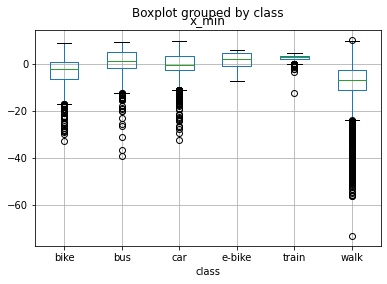

In [415]:

df4.boxplot(by='class',column=['x_min']) 


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


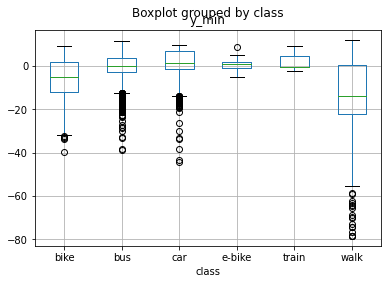

In [416]:
df4.boxplot(by='class',column=['y_min']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


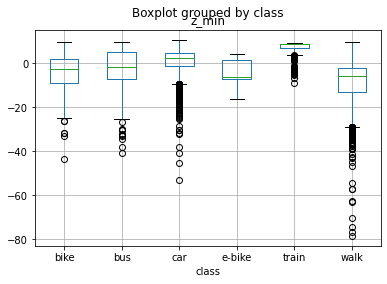

In [417]:
df4.boxplot(by='class',column=['z_min']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


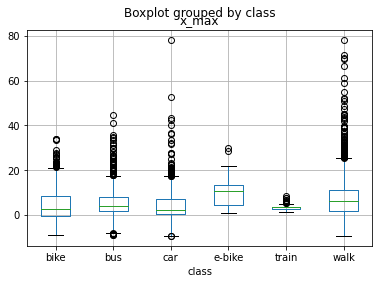

In [418]:
df4.boxplot(by='class',column=['x_max']) 




/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


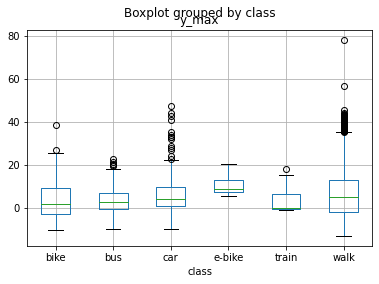

In [419]:
df4.boxplot(by='class',column=['y_max']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


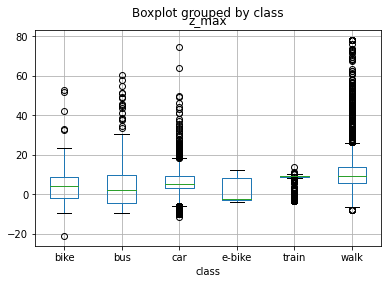

In [420]:
df4.boxplot(by='class',column=['z_max']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


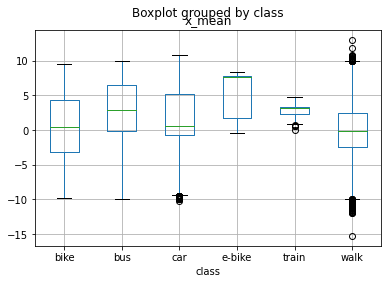

In [421]:
df4.boxplot(by='class',column=['x_mean']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


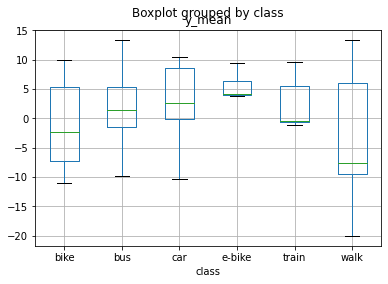

In [422]:
df4.boxplot(by='class',column=['y_mean']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


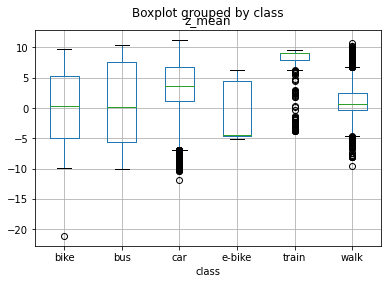

In [423]:
df4.boxplot(by='class',column=['z_mean']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


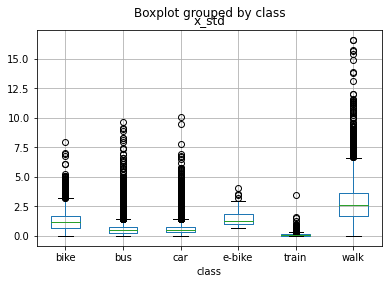

In [424]:
df4.boxplot(by='class',column=['x_std']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


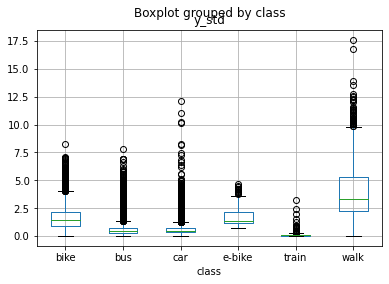

In [425]:
df4.boxplot(by='class',column=['y_std']) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


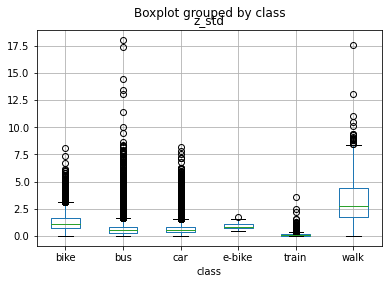

In [426]:
df4.boxplot(by='class',column=['z_std']) 

#Balancing Dataset

In [427]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


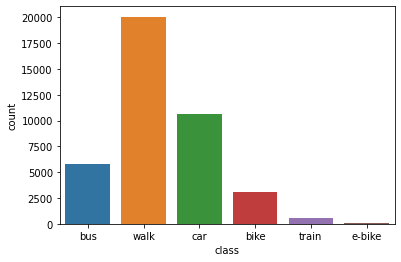

In [428]:
# A plot to show the number of different mode of trnasportation
g=sns.countplot(df4['class'])
g.set_xticklabels(['bus', 'walk', 'car', 'bike', 'train', 'e-bike'])
plt.show()

In [429]:
df4.head()

,x_min,y_min,z_min,x_max,y_max,z_max,x_mean,y_mean,z_mean,x_std,y_std,z_std,class
ans,,,,,,,,,,,,,
1000@0,-8.72,-31.190001,-19.719999,7.91,4.28,11.56,1.351463,-9.829594,0.169878,2.837040,6.414270,4.783370,walk
1000@1,-6.66,-32.990002,-16.870001,7.98,6.43,13.31,1.319355,-9.822137,-0.065282,2.913423,5.937518,4.439168,walk
1000@10,-6.12,-25.910000,-14.420000,9.67,2.35,12.74,1.523306,-9.898000,-0.099388,2.806146,4.795777,4.374881,walk
1000@11,-7.81,-18.620001,-12.650000,8.33,-2.02,10.16,1.257056,-9.735202,0.219153,2.660034,3.916937,3.897041,walk
1000@12,-6.55,-22.010000,-14.580000,12.90,-1.34,11.09,1.585823,-9.894980,-0.005181,2.982561,3.993989,4.243417,walk


In [438]:
df4=df4.dropna()

In [439]:
X = df4[['x_min',	'y_min',	'z_min',	'x_max',	'y_max',	'z_max',	'x_mean',	'y_mean',	'z_mean',	'x_std',	'y_std',	'z_std']]
Y=df4['class']

In [440]:
Y

ans
1000@0      5
1000@1      5
1000@10     5
1000@11     5
1000@12     5
1000@13     5
1000@14     5
1000@15     5
1000@16     5
1000@17     5
1000@18     5
1000@19     5
1000@2      5
1000@20     5
1000@3      5
1000@4      5
1000@5      5
1000@6      5
1000@7      5
1000@8      5
1000@9      5
1001@0      5
1001@1      5
1001@2      5
1001@4      5
1001@5      5
1001@6      5
1001@7      5
1001@8      5
1002@0      5
1003@0      5
1003@1      5
1003@10     5
1003@11     5
1003@12     5
1003@13     5
1003@14     5
1003@15     5
1003@16     5
1003@17     5
1003@18     5
1003@19     5
1003@2      5
1003@20     5
1003@21     5
1003@22     5
1003@23     5
1003@24     5
1003@25     5
1003@26     5
1003@27     5
1003@28     5
1003@29     5
1003@3      5
1003@30     5
1003@31     5
1003@32     5
1003@33     5
1003@34     5
1003@35     5
1003@36     5
1003@37     5
1003@38     5
1003@39     5
1003@4      5
1003@40     5
1003@41     5
1003@42     5
1003@43     5
1003@44     5
1003@45     5
10

In [441]:
# Used Random under sampler to balance the number of different mode of transportation
# Program to output number of data points obtained for each transportation mode in the balanced dataset

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_new, y_new = rus.fit_resample(X, Y)
print('original dataset shape:', Counter(Y))
print('Resample dataset shape', Counter(y_new))


original dataset shape: Counter({2: 20033, 1: 10597, 5: 5772, 0: 3123, 4: 597, 3: 77})
Resample dataset shape Counter({0: 77, 1: 77, 2: 77, 3: 77, 4: 77, 5: 77})


#Training and Split Dataset

In [442]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df4['class']= label_encoder.fit_transform(df4['class'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=1)

print(len(X_train))
print(len(X_val))
print(len(X_test))


276
93
93


#SVM

In [443]:
from sklearn.svm import SVC  

z = SVC (kernel='linear') 
z.fit(X_train, y_train)

SVC(kernel='linear')

In [444]:
pre=z.predict(X_test)
pre

array([4, 1, 1, 0, 4, 0, 1, 3, 0, 5, 0, 0, 4, 2, 4, 0, 1, 4, 0, 3, 4, 1,
       0, 3, 5, 2, 3, 0, 4, 2, 3, 3, 4, 2, 0, 3, 5, 1, 4, 0, 1, 5, 3, 1,
       1, 0, 3, 4, 5, 5, 2, 4, 1, 2, 5, 5, 4, 5, 4, 0, 2, 5, 4, 1, 1, 0,
       1, 3, 4, 4, 3, 3, 5, 2, 1, 3, 0, 5, 3, 3, 1, 2, 5, 5, 3, 5, 4, 1,
       1, 2, 3, 3, 0])

In [445]:
print(y_test)

330    4
101    1
191    2
66     0
326    4
450    5
225    2
246    3
67     0
407    5
457    5
168    2
366    4
186    2
185    2
4      0
192    2
329    4
47     0
273    3
201    2
146    1
172    2
304    3
447    5
189    2
283    3
31     0
379    4
161    2
245    3
300    3
338    4
309    4
5      0
299    3
431    5
307    3
359    4
17     0
164    2
425    5
292    3
65     0
90     1
132    1
232    3
162    2
386    5
296    3
311    4
323    4
224    2
29     0
453    5
439    5
187    2
427    5
208    2
62     0
117    1
415    5
341    4
218    2
139    1
128    1
102    1
298    3
340    4
375    4
290    3
409    5
452    5
92     1
214    2
286    3
6      0
411    5
272    3
233    3
180    2
107    1
440    5
403    5
270    3
58     0
347    4
78     1
399    5
267    3
294    3
388    5
392    5
Name: class, dtype: int64


In [446]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

0.6344086021505376

#Logistic Regression

In [447]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [448]:

predictions = logisticRegr.predict(X_test)

In [449]:
accuracy_score(y_test,predictions)

0.6666666666666666

#ANN

In [450]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(128,), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(128,), random_state=1,
              solver='lbfgs')

In [451]:
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), random_state=1,
              solver='lbfgs')

In [452]:
PreAnn=clf.predict(X_test)

In [453]:
PreAnn

array([4, 1, 2, 0, 4, 5, 5, 3, 5, 5, 5, 5, 4, 3, 4, 0, 1, 4, 0, 3, 2, 1,
       2, 3, 5, 3, 3, 5, 4, 2, 3, 3, 4, 4, 5, 3, 5, 2, 4, 0, 1, 5, 3, 0,
       1, 3, 3, 2, 5, 3, 4, 4, 1, 3, 5, 5, 3, 5, 4, 0, 0, 5, 4, 2, 1, 0,
       1, 3, 2, 4, 3, 0, 5, 1, 1, 3, 5, 1, 3, 3, 2, 1, 5, 5, 3, 1, 4, 1,
       5, 3, 3, 3, 5])

In [454]:
accuracy_score(y_test,PreAnn)

0.7311827956989247